$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 1** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Maximum likelihood estimation (MLE), Maximum a posteriori (MAP)**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Vasileios** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 16/4** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Name, Personal no., email** <br />

General guidelines:
* All solutions to theoretical problems, can be submitted as a single file named *report.pdf*. They can also be submitted in this ipynb notebook, but equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above and also in your file *report.pdf*.
* All datasets can be downloaded from the course website.
* All tables and other additional information should be included.

# Theoretical problems

## [Maximum likelihood estimator (MLE), 4 points]

Consider a dataset $x_1, \ldots, x_n$ consisting of i.i.d. observations 
generated from a **spherical** multivariate Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu \in \mathbb{R}^p$, $I$ 
is the $p \times p$ identity matrix, and $\sigma^2$ is a
scalar. Derive the maximum likelihood estimator for $\sigma$.

## [Posterior distributions, 6 points]

Consider dataset $x_1, \ldots, x_n $ consisting of i.i.d. observations 
generated from a **spherical** multivariate Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu =
[\mu_{1},\, \mu_{2}]^{\top} \in \mathbb{R}^2$, $I$ 
is the $2 \times 2$ identity matrix, and $\sigma^2$ is a scalar. 
The probability distribution of a point $\mathbf{x}=[x_{1},\, x_{2}]^{\top}$ is given by

$$ P(X = x \,|\, \sigma^{2}) =  \frac{1}{ 2\pi \sigma^2}   \exp
\left( -\frac{ (x - \mu)^{\top}(x - \mu) }{2\sigma^{2}} \right)
~.$$

We assume that $\sigma^{2}$ has an **inverse-gamma** prior distribution
given by
$$ P(\sigma^{2} = s | \alpha, \beta) =
\frac{\beta^{\alpha}}{\Gamma(\alpha)} s^{-\alpha-1} \exp\left( -
  \frac{\beta}{s}\right)~. \tag{1} $$
  
where $\alpha$ and $\beta$ are parameters and $\Gamma(\cdot)$ is the
gamma function given by $\Gamma(x) = \int_{0}^{\infty} t^{x-1} e^{-t}
dt $.

1. Derive the posterior distribution $p(\sigma^{2} = s | x_{1} , \ldots, x_{n}; \alpha, \beta)$. (HINT: inverse-gamma distribution is conjugate prior to sphericalGaussian distribution when mean is known).

2. Assume $\mu$ is known and consider two separate models (having different parameters)

    * $\alpha =1$ and $\beta=1$ (Model $M_{A}$)
    * $\alpha = 10$ and $\beta= 1$ (Model $M_{B}$) 

Compute analytically the expression for the MAP estimate for both models in terms of posterior parameters referred to as $\alpha_{1}, \beta_{1}$.

# Practical problems

**Useful python libraries/functions:**
* **General:**  shape, reshape, np.mean etc.
* **Plotting:** plot, scatter, legend, hold, imshow, subplot,
  grid, title etc.

## [Spherical Gaussian estimation, 5 points]

Consider a dataset consisting of i.i.d. observations
generated from a spherical Gaussian distribution $N(\mu, \sigma^2I)$, where $\mu \in \mathbb{R}^p$, $I$ 
is the $p \times p $ identity matrix, and $\sigma^2$ is a scalar.

(a) Write the mathematical expression for the MLE estimators for $\mu$ and $\sigma$ in above setup. (HINT: Use latex equations here, or mention in pdf. This [link](http://data-blog.udacity.com/posts/2016/10/latex-primer/) might be useful if you choose to write here).

(b) Implement a function **sge()** that estimates the mean $\mu$ and variance $\sigma^{2}$ from the given data, using the skeleton code provided below. Note: You cannot use **numpy.cov** and **numpy.mean** or any other functions for calculating the mean and variance.

(c) Implement a function **myplot1()** which takes as input a two-dimensional dataset $x$ (as described above); and draws, on the same plot, the following:
1. A scatter plot of the original data $x$, 
2. Circles with center $\mu$ and radius $r=k \sigma$ for $k=1, 2, 3$ where $\mathbf{\mu}$ and $\sigma^{2}$ denote the mean and variance estimated using **sge()**. 
3. Legend for each circle indicating the fraction of points (in the original dataset) that lie outside the circle boundary.

(d) Load 'dataset0.txt' and run your code using only the first two features of the dataset. Submit the resulting plot as well as your implementation here.

# Answers:
## a):
The MLE estimator for $\sigma$ is the same as derived in theoretical solution to the first problem (see pdf): $\sigma = \sqrt{\frac{\sum^{n}_{i}(x_i - \mu)^T(x_i - \mu)}{n}}$

The MLE estimator for $\mu$ is as follows: <br>
From the logarithmic likelihood function provided in theoretical solution 1:
$$ln(L(\mathbf{x}| \mu, \sigma^{2}I)) = \frac{-np}{2} \cdot ln(2\pi)-\frac{n}{4} \cdot ln(p)-n \cdot ln(\sigma) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \mu)^T(x_i - \mu)$$
<br>
We now derive with respect to $\mu$ instead of $\sigma$: 
$$\frac{\delta \ ln(L(\mathbf{x}| \mu, \sigma^{2}I))}{\delta \ \mu} =\frac{1}{\sigma^2} \sum_{i=1}^{n}(x_i - \mu)$$
Which we set to zero:
$$ 0 =\frac{1}{\sigma^2} \sum_{i=1}^{n}(x_i - \mu) = \sum_{i=1}^{n}(x_i - \mu)$$
And since $\mu$ is constant, it can be removed from the summation:
$$ 0 = -\mu \cdot n + \sum_{i=1}^{n}x_i$$
Which gives us the final expression for the MLE estimation for $\mu$:
$$\mu = \frac{\sum_{i=1}^{n}x_i}{n}$$

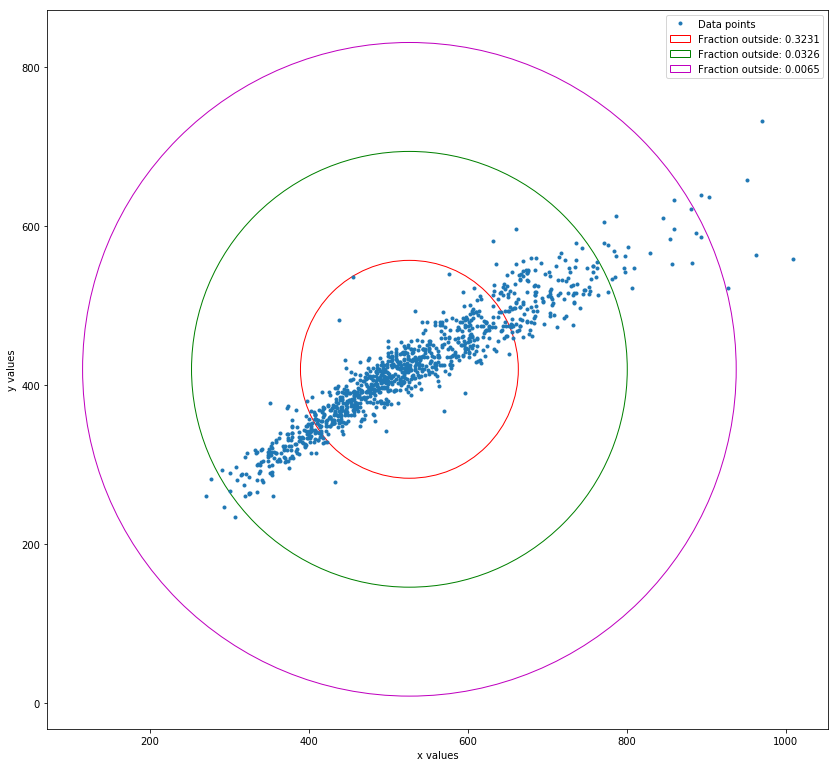

In [5]:
### b), c) and d):
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("dataset0.txt")
data = data[:,0:2]

def sge(X):
   
    #SGE Mean and variance estimator for spherical Gaussian distribution

    # X : Data matrix of size n x p where each row represents a p-dimensional data point
    n,p = X.shape
    #mu : Estimated mean o f the dataset [mu_1 mu_2 . . . mu_p]
    mu = np.sum(X, 0)/ float(n)
    #sigma : Estimated standard deviation of the dataset ( number )
    sig = np.sqrt(np.sum((X-mu)**2)/float(n))
    
    return mu, sig

def myplot1(X):
    n,p = X.shape
    mu, sig = sge(X)
    # Plot data points
    plt.figure(figsize=(14,14))
    plt.plot(data[:,0], data[:,1], '.')
    
    # Calculate distance from middle for all points
    dists = np.sqrt((data[:,0]-mu[0])**2+(data[:,1]-mu[1])**2)
    
   
    
    frac = np.zeros(3)
    colors = ['r','g','m']
    
    for k in range(1,4):
        r = k*sig
        # Take the amount of data points further away from mu than radius and divide by total
        frac[k-1] = np.sum(dists > r)/ float(n)
        
        # Plot the circles, center= mu, radius= r
        circle = plt.Circle(mu, r, color=colors[k-1], Fill = False)
        plt.gca().add_patch(circle)
    
    plt.axis('scaled')
    # Create legend
    legends =["Data points", "Fraction outside: %.4f" % frac[0],"Fraction outside: %.4f" % frac[1],"Fraction outside: %.4f" % frac[2]]
    plt.xlabel("x values")
    plt.ylabel("y values")
    plt.legend(legends)
    plt.show()
    
    
myplot1(data)

## [MAP estimation, 5 points]

Consider dataset $x_1, \ldots, x_n $ consisting of i.i.d. observations 
generated from a multivariate normal distribution $N(\mu, \sigma^2I)$, where $\mu =
[\mu_{1},\, \mu_{2}]^{\top} \in \mathbb{R}^2$, $I$ 
is the $2 \times 2$ identity matrix, and $\sigma^2$ is a scalar. We will now explore the Bayesian approach to estimation of $\sigma^{2}$ *under the assumption that the mean $\mu$ is known.*
The probability distribution of a point $\mathbf{x}=[x_{1},\, x_{2}]^{\top}$ is given by

$$ P(X = x \,|\, \sigma^{2}) =  \frac{1}{ 2\pi \sigma^2}   \exp
\left( -\frac{ (x - \mu)^{\top}(x - \mu) }{2\sigma^{2}} \right)
~.$$

We assume that $\sigma^{2}$ has an **inverse-gamma** prior distribution
given by
$$ P(\sigma^{2} = s | \alpha, \beta) =
\frac{\beta^{\alpha}}{\Gamma(\alpha)} s^{-\alpha-1} \exp\left( -
  \frac{\beta}{s}\right)~. \tag{1} $$
  
where $\alpha$ and $\beta$ are parameters and $\Gamma(\cdot)$ is the
gamma function given by $\Gamma(x) = \int_{0}^{\infty} t^{x-1} e^{-t}
dt $.

Assume that your dataset now consists of just the first two features of 'dataset0.txt'.

(a) Choose $\mu$ to be the empirical mean. Implement a function **myplot2()**, that on the same plot, shows the prior and posterior distributions for $\sigma$ with parameters $\alpha = 1 $ and $\beta = 1$.  Generate a second plot with $\alpha=10$ and $\beta=1$. What do you observe?

HINT:
   * Calculate the posterior distribution using the data and the formula that you derived in the theoretical question **"Posterior distributions"**.
   * You might want to check out the "log-sum-exp trick".

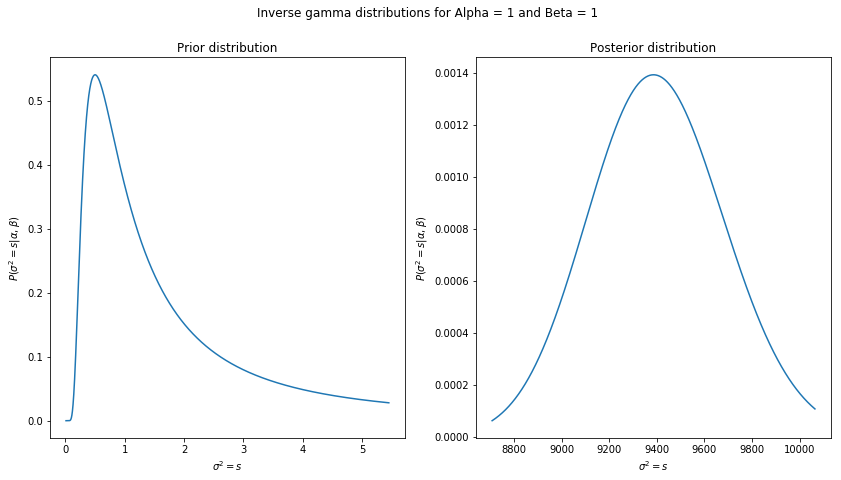

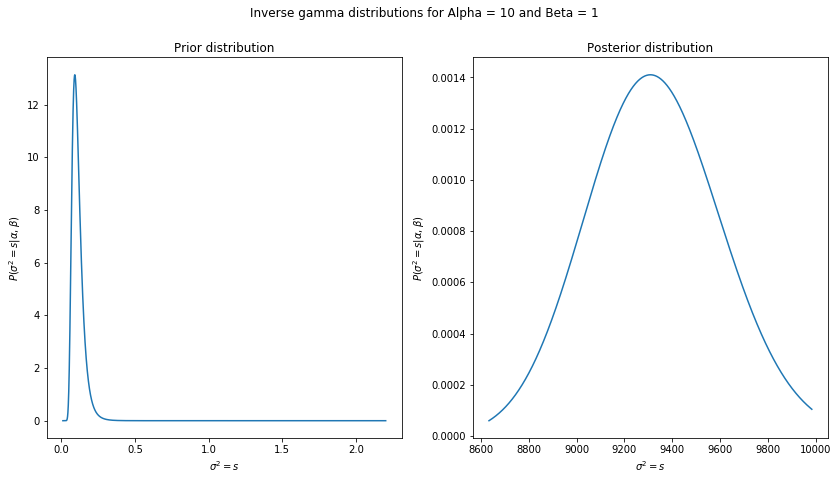

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spec
import math

data = np.loadtxt("dataset0.txt")
data = data[:,0:2]
n,p = data.shape

def log_gamma_dist(s, ap, bp):
    #print(ap* np.log(bp))
    #print(math.lgamma(ap))  # Used lgamma function to avoid overflow
    #print((ap+1)*np.log(s))
    #print(bp/s)
    return((ap* np.log(bp))-(math.lgamma(ap))-((ap+1)*np.log(s))-(bp/s))


def plot_helper(alpha, beta, ap, bp):
    
    plt.figure(figsize=(14,7))
    plt.suptitle("Inverse gamma distributions for Alpha = %i and Beta = %i" % (alpha, beta))
    
    #### Prior ####
    pre_max = beta/float(alpha+1) # Find max s for the current alpha/beta values
    pre_sig = np.sqrt(pre_max)    # Take the sqrt to have an appropriate step size
    
    # Added max on the lower limit as it was complaining for the value 0
    # Takes 7 steps in either direction from the max to "show" the whole distribution
    pre_sig2 = np.linspace(max(0.01, pre_max - 7* pre_sig), pre_max + 7* pre_sig, 10000)
    pre_dist = np.exp(log_gamma_dist(pre_sig2,alpha,beta)) # Take the exp to create the "regular" distribution
    
    #### Posterior ####
    post_max = bp/float(ap +1)
    post_sig= np.sqrt(post_max)
    post_sig2 = np.linspace(post_max - 7*post_sig ,post_max + 7*post_sig , 10000)
    post_dist = np.exp(log_gamma_dist(post_sig2,ap,bp))
    
    #### Plot the distributions
    plt.subplot(121)
    plt.title("Prior distribution")
    plt.ylabel(r'$P(\sigma^{2} = s | \alpha, \beta) $')
    plt.xlabel(r'$\sigma^{2} = s$')
    plt.plot(pre_sig2, pre_dist)
    
    plt.subplot(122)
    plt.title("Posterior distribution")
    plt.ylabel(r'$P(\sigma^{2} = s | \alpha, \beta) $')
    plt.xlabel(r'$\sigma^{2} = s$')
    plt.plot(post_sig2, post_dist)
    

def myplot2():
    mu = np.sum(data,0)/ float(n)
    norm_data = data-mu
    
    # Calculate the sum to be able to calculate beta posterior (bp)
    sum = 0
    for datapoint in norm_data:
        temp1 = datapoint.T
        sum += temp1.dot(datapoint)
    
    # Prior :Alpha = 1, Beta = 1
    alpha1 = 1
    beta1 = 1
    bp1 = beta1 + sum/2 # Formulas taken from theoretical task 2
    ap1 =  alpha1 + n
    plot_helper(alpha1,beta1,ap1,bp1) # Plots the distributions based on the alpha/beta values
    
    # Prior: Alpha = 10, Beta = 1
    alpha2 = 10
    beta2 = 1
    bp2 = beta2 + sum/2
    ap2 =  alpha2 + n
    plot_helper(alpha2,beta2,ap2,bp2)
    
    
    plt.show()
    
    
myplot2()
    

Observations: